In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv("lays_synthetic_data-updated.csv")

In [3]:
le=LabelEncoder()
df["flavor"]=le.fit_transform(df["flavor"])

In [4]:
X = df[["weight_g", "flavor",]]
y = df["chip_count"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
test_packet_df = pd.DataFrame([[10.0, le.transform(["Classic"])[0]]],
columns=["weight_g", "flavor"])
prediction = model.predict(test_packet_df)
print(f"Your packet contains... {int(prediction[0])} chips!")

Your packet contains... 6 chips!


In [8]:
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.8618000000000001
R² Score: 0.9758476197977689


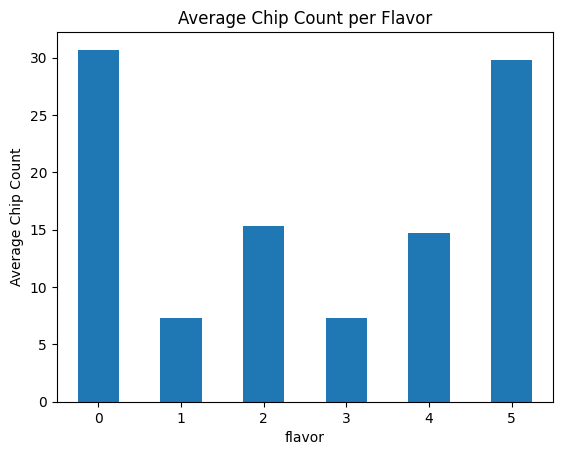

In [9]:
df.groupby("flavor")["chip_count"].mean().plot(kind='bar')
plt.ylabel("Average Chip Count")
plt.title("Average Chip Count per Flavor")
plt.xticks(rotation=360)
plt.show()

In [10]:
def predict_chips(weight, flavor_str):
    encoded_flavor = le.transform([flavor_str])[0]
    test_data = [[weight, encoded_flavor]]
    prediction = model.predict(test_data)
    return int(prediction[0])
print("Your packet contains...", predict_chips(50.0, "Classic"), "chips!")

Your packet contains... 29 chips!


C:\Users\plasm\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [14]:
import joblib as jb
jb.dump(model,"chip_count_predictor.pk1")

['chip_count_predictor.pk1']

In [18]:
model = jb.load('chip_count_predictor.pk1')